## Лабораторна робота №9

# Ймовірнісний аналіз неперервних випадкових величин із використанням Numpy і SciPy

Наведено завдання до лабораторної роботи й приклади їх виконання для розподілу Гаусса.
Кожний студент має окреме завдання відповідно до [варіанту](https://dl.tntu.edu.ua/content.php?cid=382423). Для кожного варіанту задано [назву розподілу, його параметри та відповідне посилання на документацію](https://dl.tntu.edu.ua/content.php?cid=382539) модуля [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).


### Завдання 1.
Записати вираз щільності заданого розподілу (представити у звіті), відповідно до варіанту. Охарактеризувати його основні властивості та область його практичного застосування.

#### Приклад 
Щільність розподілу Гаусса має такий вигляд:    
$$\LARGE p(x) = \frac{1}{{\sigma \sqrt {2\pi } }}{e^{ - \frac{{{{(x - a)}^2}}}{{2{\sigma ^2}}}}},{\rm{   }}x \in ( - \infty ,\infty )$$   
$\large \text{де } a \in \left( { - \infty ,\infty } \right),\;\sigma  > 0 \text{ - параметри розподілу}$   
Розподіл Гаусса (нормальний розподіл) є найбільш поширеним розподілом у практичних застосуваннях, що зумовлено тим фактом, що розподіл суми великого числа незалежних випадкових величин здебільшого є нормальним (центральна гранична теорема). Важливо, що параметри цього розподілу дорівнюють математичному сподіванню та дисперсіїї випадкової величини ......... і.т.д.      
(обсяг тексту у звіті - до 0.5 сторінки)

### Завдання 2.
Зобразити графіки щільності розподілу та функції розподілу.

#### Приклад 
(будемо розглядати розподіл Гаусса (нормальний розподіл) з математичним сподіванням a = 3, середнім квадратичним відхиленням sigma = 5.1)

In [1]:
import numpy as np

from scipy.stats import norm
# тут потрібно імпортувати модуль, що стосується того розподілу, що у завданні відповідно до варіанту

import matplotlib.pyplot as plt

# встановлення характеристик графіків (глобально, для всіх графіків)
plt.rcParams.update({'font.size': 16, 'font.family': 'serif'})

In [2]:
# параметри розподілу, відповідно до варіанту
a, sigma = 3, 5.1

# задаємо масив точок на осі x 
x = np.linspace(a - 4*sigma, a + 4*sigma, 10000)

'''
тут 10000 точок в інтервалі від (a - 4*sigma) до (a + 4*sigma) 
як задати цей інтервал для інших варіантів?
'''

# масив значень щільності розподілу
p = norm.pdf(x, a, sigma)

# масив значень функції розподілу
F = norm.cdf(x, a, sigma)

побудова графіків щільності розподілу та функції розподілу із використанням matplotlib (object-oriented API)

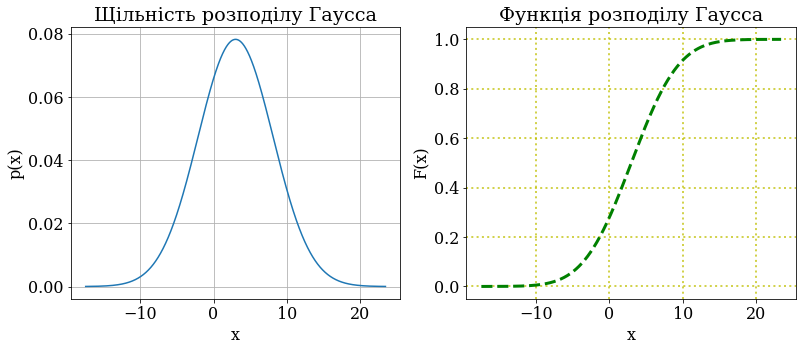

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5)) 

# графік щільності розподілу
ax[0].plot(x, p)

# графік функції розподілу (тут змінено колір (g), тип (--) і товщину лінії)
ax[1].plot(x, F, 'g--', linewidth = 3)

# сітка на графіку щільності розподілу (параметри за замовчуванням)
ax[0].grid()

# сітка на графіку функції розподілу (змінено колір, прозорість, тип і товщину ліній сітки)
ax[1].grid(color='y', alpha=0.7, linestyle=':', linewidth=2)

# позначенння осей та заголовки графіків
ax[0].set(xlabel='x', ylabel='p(x)',   
       title='Щільність розподілу Гаусса') 

ax[1].set(xlabel='x', ylabel='F(x)',   
       title='Функція розподілу Гаусса')

# зберегти рисунки у файлі distribution.png
fig.savefig("distribution.png", dpi=200)

plt.show()

### Завдання 3.
Обчислити математичне сподівання, дисперсію, коефіцієнти асиметрії та ексцесу

#### Приклад 

In [4]:
m, var, skew, kurt = norm.stats(a, sigma, moments='mvsk')

print(f' Математичне сподівання = {m:.3f}, дисперсія = {var:.3f} \n',
        f'Коефіцієнт асиметрії = {skew:.3f}, коефіцієнт ексцесу = {kurt:.3f}')


 Математичне сподівання = 3.000, дисперсія = 26.010 
 Коефіцієнт асиметрії = 0.000, коефіцієнт ексцесу = 0.000


### Завдання 4.
Обчислити квантиль рівня $\large V\over\LARGE40$ (де $\large V$ - номер варіанту), медіану розподілу  
Припустимо, що номер варіанту у нас $\large V = 3$, потрібно обчислити квантиль рівня 3/40


#### Приклад

In [5]:
# квантиль рівня 0.075
kvantyl = norm.ppf(0.075, a, sigma)

# медіана
med = norm.median(a, sigma)

print(f'Квантиль рівня 0.075 дорівнює {kvantyl:.3f}, медіана дорівнює {med:.3f}')

Квантиль рівня 0.075 дорівнює -4.342, медіана дорівнює 3.000


### Завдання 5.
Знайти ймовірність попадання випадкової величини у інтервал $\large [T_1, T_2],$ де $\large T_1=\frac{V}{30}, T_2=\frac{V}{10}$

#### Приклад

In [6]:
# ймовірність попадання в інтервал [0.1, 0.3]
P = norm.cdf(0.3, a, sigma) - norm.cdf(0.1, a, sigma)

print(f'Ймовірність попадання випадкової величини у інтервал [0.1, 0.3] дорівнює {P:.5f}')

Ймовірність попадання випадкової величини у інтервал [0.1, 0.3] дорівнює 0.01346


### Завдання 6. Комп'ютерне імітаційне моделювання випадкових величин із заданим розподілом.
Згенерувати 1000 псевдовипадкових чисел із заданим розподілом, зобразити їх графічно


#### Приклад

In [7]:
n = 1000

# формування масиву псевдовипадкових чисел із розподілом Гаусса з використанням scipy.stats
X = norm.rvs(a, sigma, size=n)

# перші 10 елементів
print(X[0:10])

[ 4.71023281  0.10823273  6.87720983  8.26293244  1.44626134 -2.93970135
 -3.56989213  4.25044021  8.5381003   1.41533297]


графічне зображення згенерованої послідовності (перших 100 її елементів), pyplot API


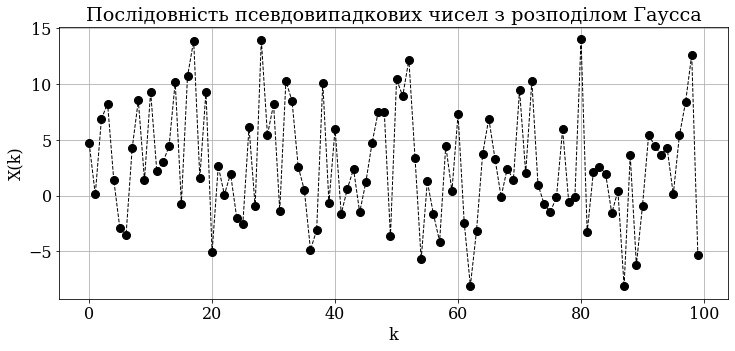

In [8]:
plt.figure(figsize=(12,5))

# 'ko--' - k - колір (у даному випадку чорний), о - вигляд маркера, -- - тип лінії)
plt.plot(X[0:100], 'ko--', linewidth=1, markersize=8)

plt.title('Послідовність псевдовипадкових чисел з розподілом Гаусса')
plt.xlabel('k')
plt.ylabel('X(k)')

plt.grid()
plt.show()

### Завдання 7. Обчислення кількості елементів масиву, що задовольняють певній умові. Bar Chart. Pie Chart
Розбити область можливих значень випадкової величини на 3 підінтервали (довільно).
Обчислити кількість псевдовипадкових чисел, що попадають у кожен iнтервал. 
Візуалізувати отриманий результат з використанням Bar Chart і Pie Chart

#### Приклад
Область значень гауссівської випадкової величини $(-\infty, \infty)$. Розглянемо її розбиття на три підінтервали:  
$\large (-\infty, -0.01],$  
$\large (-0.01, 1.3),$   
$\large [1.3, \infty)$


In [9]:
# Масив елементів, які попадають у перший інтервал
X1 = X[X <= -0.01]

# Масив елементів, які попадають у другий інтервал
X2 = X[(X > -0.01) & (X < 1.3)]

# Масив елементів, які попадають у третій інтервал
X3 = X[X >= 1.3]

# Число елементів у кожному масиві
Y = [len(X1), len(X2), len(X3)]

print(Y)

[267, 97, 636]


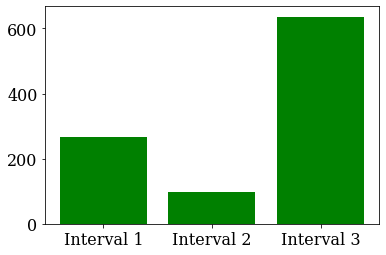

In [10]:
# Bar Chart

objects = ('Interval 1', 'Interval 2', 'Interval 3')

plt.bar(objects, Y, color='green')

plt.show()

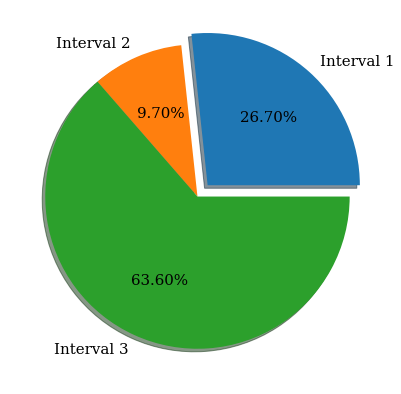

In [11]:
# Pie Chart

plt.figure(figsize=(7,7))

plt.pie(Y, labels = objects, explode=[0.1, 0, 0], autopct='%.2f%%', shadow=True, textprops = {"fontsize":15})

plt.show()

### Висновки.  
Навести висновки, відповідно до виконаних завдань. Не копіюйте висновки у інших студентів.